In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn 
from numpy import NaN as nan
import math

In [3]:
#Import Data
data=pd.read_excel('data.xlsx')
data.rename(columns={'Unnamed: 0':'ID' },inplace=True)

data_en=pd.read_excel('data_en.xlsx')
data_en.rename(columns={'Unnamed: 0':'ID' },inplace=True)

data.head(10)


,ID,Name,Date,Abstract,Content Type,Subject,Keywords,Authors,University,Url
0,4560,شناسایی عوامل کلیدی مؤثر بر آینده بازیابی اطلا...,2009-04-01,در جهان کنونی که اطلاعات از هر طرف انسان­ها را...,پژوهشي,ذخیره و بازیابی,"نظام‌های بازیابی اطلاعات, متخصصان علم اطلاعات,...","['ابوالفضل اسدنیا', 'مهرداد چشمه سهرابی', 'احم...","['دانشگاه اصفهان،اصفهان، ایران', 'دانشگاه اصفه...",https://jipm.irandoc.ac.ir/./article-1-4560-fa...
1,4455,ارائه الگوی پیشنهادی برای سیاست‌های تسهیل‌گر ع...,2009-04-01,علم آزاد بستر و سازو­کاری است که علم یا دستاور...,پژوهشي,دسترسی آزاد، علم آزاد، و داده آزاد,"علم همگانی, علم باز, دسترسی آزاد, ارتباطات علم...",['شیما مرادی'],['مرکز تحقیقات سیاست علمی کشور'],https://jipm.irandoc.ac.ir/./article-1-4455-fa...
2,4410,پژوهش‌های حیطه ربط در ایران: مرور نظام‌مند,2009-04-01,ربط از جمله مفاهیمی است که به تایید محققان بسی...,مروري,ذخیره و بازیابی,"ربط, جامعیت, مانعیت, قضاوت ربط, بازخورد ربط, ب...","['یعقوب نوروزی', 'سمانه خویدکی', 'زهرا صدرآبادی']","['دانشگاه قم', '', 'دانشگاه قم']",https://jipm.irandoc.ac.ir/./article-1-4410-fa...
3,4472,ارائه مدل شایستگی مدیر ارشد دیجیتال به عنوان ح...,2009-04-01,در عصر حاضر، سازمان‌ها درک کرده‌اند که بدون اس...,پژوهشي,دیگر زمینه‌ها، موضوع‌ها، و فناوری‌های نوین در ...,"تحول دیجیتال, حکمرانی تحول دیجیتال, مدیر ارشد ...","['سید مهدی حسینی نسب', 'مهدی شامی زنجانی', 'آر...","['دانشگاه تهران', 'دانشگاه تهران', 'دانشگاه ته...",https://jipm.irandoc.ac.ir/./article-1-4472-fa...
4,4489,استخراج هوشمند مرز فراداده و متن در پایان نامه...,2009-04-01,استخراج فراداده باعث تسهیل در فرآیند نمایه­ساز...,پژوهشي,ذخیره و بازیابی,"استخراج فراداده, استخراج اطلاعات, ماشین بردار ...","['محدثه رهنما', 'سیدمحمدحسین هاشمی نژاد', 'جلا...","['دانشگاه الزهرا(س)', 'دانشگاه الزهرا(س)', '، ...",https://jipm.irandoc.ac.ir/./article-1-4489-fa...
5,4499,سنجش مؤلفه‌های امنیت اطلاعات در دسترسی و استفا...,2009-04-01,امنیت اطلاعات یکی از عوامل موثر در حفاظت از ک...,پژوهشي,امنیت,"امنیت اطلاعات , شهرستان قم , کتابخانه‌های دیجی...","['فریبرز درودی', 'زینب جمشیدی']",['پژوهشگاه علوم وفناوری اطلاعات ایران(ایرانداک...,https://jipm.irandoc.ac.ir/./article-1-4499-fa...
6,4290,تعیین میزان قابلیت اطمینان در سیستم‌های پرسش و...,2009-04-01,ارزیابی سیستم­های پرسش و پاسخ تعاملی به منظور ...,پژوهشي,فناوري اطلاعات,"قابلیت اطمینان, معیار ارزیابی, خصوصیات کیفی نر...","['محمدمهدی حسینی', 'علیرضا جلالی']",['واحد شاهرود، دانشگاه آزاد اسلامی، شاهرود، ای...,https://jipm.irandoc.ac.ir/./article-1-4290-fa...
7,4477,ارائه روشی مبتنی بر ژنتیک برای رفع ابهام نام ن...,2009-04-01,امروزه با افزایش روزافزون حجم مقالات از یک طرف...,پژوهشي,ذخیره و بازیابی,"ابهام نام نویسندگان, فاصله لونشتین, الگوریتم ژ...",['نیلوفر مظفری'],['مرکز منطقه ای اطلاع رسانی علوم و فناوری'],https://jipm.irandoc.ac.ir/./article-1-4477-fa...
8,4428,مدل علّی پذیرش و استفاده از فناوری اطلاعات و ا...,2009-04-01,فناوری اطلاعات و ارتباطات همچون الگوواره جدیدی...,پژوهشي,سیستم‌های مدیریت اطلاعات و دانش,"مدل علّی پذیرش, فناوری اطلاعات و ارتباطات, نظر...","['شاهرخ محمدیان', 'ابوالفضل قاسم زاده علیشاهی'...","['دانشگاه شهید مدنی آذربایجان، تبریز، ایران', ...",https://jipm.irandoc.ac.ir/./article-1-4428-fa...
9,4390,ارزیابی تأثیر پژوهش‌ با استفاده از دگرسنجی(مطا...,2009-04-01,پژوهش حاضر مطالعه‌ای کاربردی است که با هدف ارز...,پژوهشي,ارزیابی و تحلیل,"تأثیر پژوهش, دگرسنجه‌ها, پایگاه اسکوپوس, رسانه...",['مهری صدیقی'],['پژوهشگاه علوم وفناوری اطلاعات ایران(ایرانداک...,https://jipm.irandoc.ac.ir/./article-1-4390-fa...


In [4]:
content_type_unique=data['Content Type'].dropna().value_counts()
content_type_unique

پژوهشي          1031
مروري             64
ูพฺููุดู       1
Name: Content Type, dtype: int64

Text(0.5, 1.0, 'Distribution of Content Types')

/home/anvaari/anaconda3/envs/ai_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3641 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/anvaari/anaconda3/envs/ai_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/anvaari/anaconda3/envs/ai_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3642 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/anvaari/anaconda3/envs/ai_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/anvaari/anaconda3/envs/ai_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/anvaari/anaconda

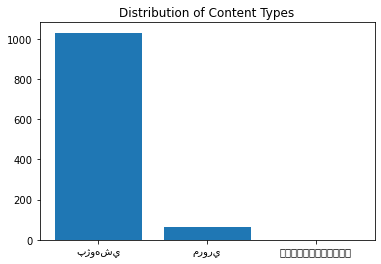

In [22]:
plt.bar(content_type_unique.index,content_type_unique.values)
plt.title('Distribution of Content Types')

In [5]:
subject_unique=data['Subject'].value_counts()
print(subject_unique)

كتابداري و اطلاع رساني                                                                          460
فناوري اطلاعات                                                                                  232
مدیریت اطلاعات                                                                                    8
موضوع سطح چهارم                                                                                   7
مدیریت دانش                                                                                       7
ذخیره و بازیابی                                                                                   6
دیگر زمینه‌ها، موضوع‌ها، و فناوری‌های نوین در پردازش و مدیریت اطلاعات و دانش علمی و فناورانه      5
سیستم‌های مدیریت اطلاعات و دانش                                                                   3
زبان شناسی رایانه ای                                                                              3
تجربه و رابط کاربری                                                                               2


In [31]:
#Assign number to sunbjects because their name are too long 
subjects_name=list(subject_unique.index)
subjects_id=[i for i in range(len(subjects_name))]

subject_unique[nan]=data['Subject'].isna().sum()
a=dict()
for i in subjects_id:
    a[i]=subjects_name[i]
a

{0: 'كتابداري و اطلاع رساني',
 1: 'فناوري اطلاعات',
 2: 'مدیریت اطلاعات',
 3: 'مدیریت دانش',
 4: 'موضوع سطح چهارم',
 5: 'ذخیره و بازیابی',
 6: 'دیگر زمینه\u200cها، موضوع\u200cها، و فناوری\u200cهای نوین در پردازش و مدیریت اطلاعات و دانش علمی و فناورانه',
 7: 'زبان شناسی رایانه ای',
 8: 'سیستم\u200cهای مدیریت اطلاعات و دانش',
 9: 'اطلاع سنجی',
 10: 'ارزیابی و تحلیل',
 11: 'تعامل انسان و اطلاعات ',
 12: 'تجربه و رابط کاربری',
 13: 'رسانه',
 14: 'سازمان\u200cدهی',
 15: 'مدیریت کیفیت',
 16: 'تحلیل داده\u200cهای کلان',
 17: 'دسترسی آزاد، علم آزاد، و داده آزاد',
 18: 'پایش و ارزیابی تأثیر',
 19: 'اصطلاح شناسی',
 20: 'رفتار اطلاع\u200cیابی',
 21: 'امنیت',
 22: 'تولید، فراهم\u200cآوری، و انتقال',
 23: 'اخلاق و حقوق',
 24: nan}

In [9]:
#check if indexex are still right
new=data['Subject'].replace(subjects_name,subjects_id)
fa=[]
for i in range(len(new)):
    if data['Subject'][i] is nan :
        fa.append(subjects_name[new[i]] is data['Subject'][i])
    else:    
        fa.append(subjects_name[new[i]] == data['Subject'][i])
fa.index(False)

ValueError: False is not in list

Text(0.5, 1.0, 'Distribution of Subjects')

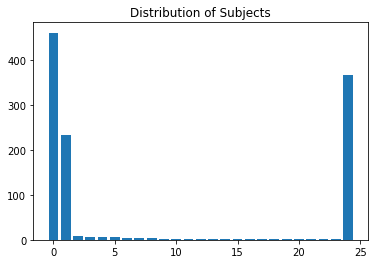

In [10]:
subjects_value=[]
for x in subjects_id:
    if subjects_name[x] is nan:
        subjects_value.append(data['Subject'].isna().sum())
        continue
    subjects_value.append(subject_unique[subjects_name[x]])
plt.bar(subjects_id,subjects_value)
plt.title('Distribution of Subjects')


In [41]:
#بررسی اینکه ایا میشه به کمک کلمه مرور مقالات مروری را تشخیص داد
mouro=[]
for i in range (64):#64 is the number of مروری content
    if data[data['Content Type']=='مروري']['Abstract'].iloc[i] is nan:
        continue
    mouro.append( 'مرور' in data[data['Content Type']=='مروري']['Abstract'].iloc[i])
print(mouro.count(True)/len(mouro)*100,'Percent of Review articles have مرور in their abstract')

22.950819672131146 Percent of Review articles have مرور in their abstract


In [42]:
pezho=[]
for i in range (1031):#1031 is the number of پژوهشی content
    if data[data['Content Type']=='پژوهشي']['Abstract'].iloc[i] is nan:
        continue
    pezho.append('مرور' in data[data['Content Type']=='پژوهشي']['Abstract'].iloc[i])
print(pezho.count(False)/len(pezho)*100 , "Percent of Research articles haven't مرور in their abstract")

93.83697813121272 Percent of Research articles haven't مرور in their abstract
